# Setup

In [ ]:
!rm -r sample_data 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Data

## Labelling

In [ ]:
import os

PATH = "/content/drive/MyDrive/Data/Capstone RealTime Data/Day_4/"
files = os.listdir(PATH)
files = [f.strip('.json') for f in files]
files = [f.strip('.csv') for f in files]
files = list(set(files))

remove_list = []
for f in files:
    if f.endswith("_final")==1:
        # print(f)
        remove_list.append(f)
        remove_list.append(f.strip('_final'))
for x in remove_list:
    files.remove(x)
files 

[]

In [ ]:
import pandas as pd
import json
import dateutil.parser as dp

labels_to_index = {'rest':0, 
                   'grab':1, 
                   'release':2,
                   'elbow_up':3, 
                   'elbow_down':4, 
                   'wrist_supination':5,
                   'wrist_pronation':6,
                   'shoulder_right':7,
                   'shoulder_left':8,
                   'None':-1}

def labelsToIndex(label):
    return labels_to_index[label]

def returnLabel(timestamp):
    with open(json_file_path, 'r') as j:
        i=0
        data = json.loads(j.read())
        while i<len(data['Markers'])-2:
           startDT = dp.parse(data['Markers'][i]['startDatetime']).timestamp()
           endDT = dp.parse(data['Markers'][i+1]['startDatetime']).timestamp()
           if startDT <= timestamp <= endDT:
               return data['Markers'][i]['label']
           i=i+1
    return "None"

dfs = []
for f in files:
    print(f)
    json_file_path = PATH + f + '.json'
    csv_file_path = PATH + f + '.csv'

    df = pd.read_csv(csv_file_path, skiprows=1)

    df['Movement Label Name'] = df.apply(lambda row: returnLabel(row['Timestamp']), axis=1)
    df['Movement Label Index'] = df.apply(lambda row: labelsToIndex(row['Movement Label Name']), axis=1)
    df.to_csv(PATH + f + '_final.csv')

## Making Sequences

In [ ]:
import os

PATH = "/content/drive/MyDrive/Data/Capstone RealTime Data/"
files = ["Day_2/"+f for f in os.listdir(PATH+"Day_2/")]
files.extend(["Day_3/"+f for f in os.listdir(PATH+"Day_3/")])
files.extend(["Day_4/"+f for f in os.listdir(PATH+"Day_4/")])
files = [f for f in files if f.endswith('_final.csv')]
files = list(set(files))
files 

['Day_2/Subject_1_EPOCFLEX_164574_2022.10.19T13.54.57+05.30_final.csv',
 'Day_2/Subject_1_EPOCFLEX_164574_2022.10.19T14.49.09+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T11.48.19+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T11.17.39+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T11.14.33+05.30_final.csv',
 'Day_4/Subject_1_EPOCFLEX_164574_2022.11.15T16.00.28+05.30_final.csv',
 'Day_4/Subject_1_EPOCFLEX_164574_2022.11.15T15.14.02+05.30_final.csv',
 'Day_2/Subject_1_EPOCFLEX_164574_2022.10.19T14.10.41+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T12.43.58+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T12.10.23+05.30_final.csv',
 'Day_4/Subject_1_EPOCFLEX_164574_2022.11.15T16.14.40+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T11.45.38+05.30_final.csv',
 'Day_3/Subject_1_EPOCFLEX_164574_2022.11.11T12.02.06+05.30_final.csv',
 'Day_4/Subject_1_EPOCFLEX_164574_2022.11.15T15.42.39+05.30_fina

In [ ]:
import pandas as pd

columns = ['EEG.Cz', 'EEG.Fz', 'EEG.Fp1', 'EEG.F7', 'EEG.F3', 'EEG.FC1', 
           'EEG.C3', 'EEG.FC5','EEG.FT9', 'EEG.T7', 'EEG.CP5', 'EEG.CP1', 
           'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1', 'EEG.Pz', 'EEG.Oz', 
           'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6', 
           'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 
           'EEG.F8', 'EEG.Fp2', 'Movement Label Index', 'Movement Label Name']

prev_df = pd.DataFrame({})
for f in files:
    df = pd.read_csv(PATH+f)
    df = df[columns]
    prev_df = pd.concat([prev_df, df])
    print(prev_df.shape)
df = prev_df

(23687, 34)
(29124, 34)
(31855, 34)
(39892, 34)
(54005, 34)
(78202, 34)
(92185, 34)
(97423, 34)
(107511, 34)
(120519, 34)
(154062, 34)
(156578, 34)
(159777, 34)
(180980, 34)
(186269, 34)
(194127, 34)
(215563, 34)
(238204, 34)
(242431, 34)
(257733, 34)
(271718, 34)
(274485, 34)
(291680, 34)
(295905, 34)
(303401, 34)
(324746, 34)
(339368, 34)
(348984, 34)
(357218, 34)
(366963, 34)
(384366, 34)
(386585, 34)
(409238, 34)
(412804, 34)
(420911, 34)
(430440, 34)
(451791, 34)
(473614, 34)
(479317, 34)
(497081, 34)
(518909, 34)
(547176, 34)
(554163, 34)
(569798, 34)
(578969, 34)
(593684, 34)
(610168, 34)


In [ ]:
# df['Movement Label Index'] = df['Movement Label Index'].replace(-1, 0) # none = rest
df = df.loc[df['Movement Label Index'] >= 0] # remove none

num_labels = 9

df['Movement Label Name'].value_counts()

elbow_up            71793
grab                69273
elbow_down          68395
release             53905
wrist_supination    52563
wrist_pronation     48767
shoulder_right      42850
shoulder_left       41300
rest                34517
Name: Movement Label Name, dtype: int64

In [ ]:
df['Movement Label Index'].value_counts()

3    71793
1    69273
4    68395
2    53905
5    52563
6    48767
7    42850
8    41300
0    34517
Name: Movement Label Index, dtype: int64

In [ ]:
import numpy as np

X = df.iloc[:, :32].values
y = df.iloc[:, 32].values.reshape(-1, 1)

# one-hot encoding
new_y = []
for i in y:
    a = np.zeros(num_labels)
    a[i] = 1
    new_y.append(a)
y = np.array(new_y)

X.shape, y.shape 

((483363, 32), (483363, 9))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((386690, 32), (386690, 9), (48336, 32), (48336, 9), (48337, 32), (48337, 9))

# Tensorflow GA-LSTM
using http://aqibsaeed.github.io/2017-08-11-genetic-algorithm-for-optimizing-rnn/

In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow import keras
import tensorflow as tf 
import numpy as np 

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGeneratorTimeSeries(Sequence):
    def __init__(self, X, y, n_steps_in, batch_size=64, shuffle=True):
        self.X = X
        self.y = y
        self.n_steps_in = n_steps_in
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.ceil((self.X.shape[0]-self.n_steps_in)/float(self.batch_size)))

    def get_seq(self, i):
        end_ix = i+self.n_steps_in
        seq_x, seq_y = self.X[i:end_ix], self.y[end_ix-1:end_ix]
        return seq_x, seq_y

    def __getitem__(self, index):
        if (index+1)*self.batch_size > self.X.shape[0]:
            batch = self.indexes[index*self.batch_size:]
        else:
            batch = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        X, y = [], []
        for i in batch:
            X_item, y_item = self.get_seq(i)
            X.append(X_item)
            y.append(y_item)

        X, y = np.array(X), np.array(y)
        y = np.reshape(y, (y.shape[0], y.shape[1]*y.shape[2]))

        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(self.X.shape[0]-self.n_steps_in)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [ ]:
train_generator = DataGeneratorTimeSeries(X_train, y_train, n_steps_in=10, batch_size=64, shuffle=True)
val_generator = DataGeneratorTimeSeries(X_val, y_val, n_steps_in=10, batch_size=64, shuffle=False)

len(train_generator), len(val_generator)

(6042, 756)

In [ ]:
X, y = val_generator.__getitem__(0)
# print(np.all(X[0] == X_val[0:10]), np.all(y[0] == y_val[9]))
print(X.shape, y.shape)

X, y = train_generator.__getitem__(0)
# print(np.all(X[0] == X_train[0:10]), np.all(y[0] == y_train[9]))
print(X.shape, y.shape)

(64, 10, 32) (64, 9)
(64, 10, 32) (64, 9)


In [ ]:
def train_evaluate(ga_individual_solution):
    # Decode GA solution to integer for window_size and num_units
    print(ga_individual_solution)
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:14])
    num_epochs = BitArray(ga_individual_solution[14:])
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    num_epochs = num_epochs.uint
    print('Window Size:', window_size, '| Num of Units:', num_units, '| Epochs:', num_epochs)

    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0:
        return 100,

    # Segment the data based on new window_size
    train_generator = DataGeneratorTimeSeries(X_train, y_train, n_steps_in=window_size, batch_size=64, shuffle=True)
    val_generator = DataGeneratorTimeSeries(X_val, y_val, n_steps_in=window_size, batch_size=64, shuffle=False)
    test_generator = DataGeneratorTimeSeries(X_test, y_test, n_steps_in=window_size, batch_size=64, shuffle=False)

    # Train LSTM model and predict on validation set
    model = Sequential()
    model.add(LSTM(num_units, activation='tanh', return_sequences=True, input_shape=(window_size, 32)))
    model.add(LSTM(num_units, activation='tanh'))
    model.add(Dense(num_labels, activation='softmax'))
    # model.add(Activation('softmax'))
    model.compile(loss="categorical_crossentropy",
                optimizer="adam", 
                metrics=[tf.keras.metrics.CategoricalAccuracy()])
    history = model.fit(train_generator, 
                        validation_data=val_generator, 
                        epochs=num_epochs, 
                        verbose=1)

    scores = model.evaluate(test_generator)
    return scores[0],

In [ ]:
!pip install deap
!pip install bitstring
from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray
population_size = 5
num_generations = 4
gene_length = 19

# As we are trying to minimize the RMSE score, that's why using -1.0.
# In case, when you want to maximize accuracy for instance, use 1.0
creator.create('FitnessMax', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# bit = toolbox.binary()
# ind = toolbox.individual()
# pop = toolbox.population(n=3)

# print("bit is of type %s and has value\n%s" % (type(bit), bit))
# print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
# print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.1)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)
r = algorithms.eaSimple(population, toolbox, cxpb=0.4, mutpb=0.2, ngen=num_generations, halloffame=hof, verbose=True)

In [ ]:
# Print top N solutions - (1st only, for now)
best_individuals = tools.selBest(population, k=1)
best_window_size = None
best_num_units = None
best_num_epochs = None

for bi in best_individuals:
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:14])
    num_epochs = BitArray(bi[14:])
    best_window_size = window_size_bits.uint
    best_num_units = num_units_bits.uint
    best_num_epochs = num_epochs.uint
    print('Window Size:', best_window_size)
    print('Num of Units:', best_num_units)
    print('Epochs:', best_num_epochs)

In [ ]:
best_window_size = 20
best_num_units = 200
best_num_epochs = 25 

In [ ]:
train_generator = DataGeneratorTimeSeries(X_train, y_train, n_steps_in=best_window_size, batch_size=64, shuffle=True)
val_generator = DataGeneratorTimeSeries(X_val, y_val, n_steps_in=best_window_size, batch_size=64, shuffle=False)
test_generator = DataGeneratorTimeSeries(X_test, y_test, n_steps_in=best_window_size, batch_size=64, shuffle=False)

# Train LSTM model and predict on validation set
model = Sequential()
model.add(LSTM(best_num_units, activation='tanh', return_sequences=True, input_shape=(best_window_size, 32)))
model.add(LSTM(best_num_units, activation='tanh'))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss="categorical_crossentropy",
              optimizer="adam", 
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=best_num_epochs, 
                    verbose=1)

scores = model.evaluate_generator(test_generator)
scores

Epoch 1/25
6042/6042 [==============================] - 53s 8ms/step - loss: 1.5798 - categorical_accuracy: 0.4183 - val_loss: 1.2655 - val_categorical_accuracy: 0.5456
Epoch 2/25
6042/6042 [==============================] - 50s 8ms/step - loss: 1.0448 - categorical_accuracy: 0.6289 - val_loss: 0.9088 - val_categorical_accuracy: 0.6806
Epoch 3/25
6042/6042 [==============================] - 51s 8ms/step - loss: 0.7867 - categorical_accuracy: 0.7254 - val_loss: 0.7342 - val_categorical_accuracy: 0.7440
Epoch 4/25
6042/6042 [==============================] - 51s 8ms/step - loss: 0.6396 - categorical_accuracy: 0.7782 - val_loss: 0.6487 - val_categorical_accuracy: 0.7759
Epoch 5/25
6042/6042 [==============================] - 50s 8ms/step - loss: 0.5524 - categorical_accuracy: 0.8096 - val_loss: 0.5854 - val_categorical_accuracy: 0.7969
Epoch 6/25
6042/6042 [==============================] - 50s 8ms/step - loss: 0.4908 - categorical_accuracy: 0.8310 - val_loss: 0.5349 - val_categorical_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


[0.3681558072566986, 0.8773930668830872]

## Inference

In [ ]:
timestep = 20
# model.save(f'/content/drive/MyDrive/models/Capstone/eeg_model_4_{timestep}.h5')
model = tf.keras.models.load_model(f'/content/drive/MyDrive/models/Capstone/eeg_model_4_{timestep}.h5')

In [ ]:
# train_generator = DataGeneratorTimeSeries(X_train, y_train, n_steps_in=timestep, batch_size=64, shuffle=True)
# val_generator = DataGeneratorTimeSeries(X_val, y_val, n_steps_in=timestep, batch_size=64, shuffle=False)
test_generator = DataGeneratorTimeSeries(X_test, y_test, n_steps_in=timestep, batch_size=64, shuffle=False)

0.8932673800111762


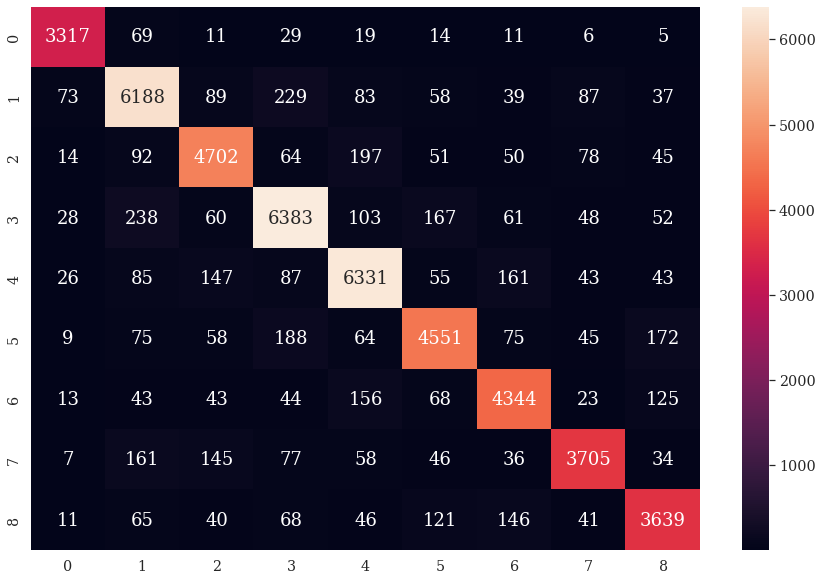

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# sns.set(font_scale=1.4)

total = 0
correct = 0
y_test_class, y_pred_class = [], []
for X_, y_ in test_generator:
    y_pred = model.predict(X_, verbose=0)
    y_ = np.argmax(y_, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    for i in range(len(y_pred)):
        if y_pred[i]==y_[i]:
            correct += 1
    y_test_class.extend(y_)
    y_pred_class.extend(y_pred)
    total += len(y_pred)

print(correct/total)
fig, ax = plt.subplots(figsize=(15,10))
cf_matrix = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cf_matrix, annot=True, fmt="d", annot_kws={'size': 18})

In [ ]:
fig.savefig(f'/content/drive/MyDrive/models/Capstone/confusion_matrix_{timestep}.eps', format='eps', dpi=600, bbox_inches='tight')
fig.savefig(f'/content/drive/MyDrive/models/Capstone/confusion_matrix_{timestep}.png', format='png', dpi=600, bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3481
           1       0.88      0.90      0.89      6883
           2       0.89      0.89      0.89      5293
           3       0.89      0.89      0.89      7140
           4       0.90      0.91      0.90      6978
           5       0.89      0.87      0.88      5237
           6       0.88      0.89      0.89      4859
           7       0.91      0.87      0.89      4269
           8       0.88      0.87      0.87      4177

    accuracy                           0.89     48317
   macro avg       0.90      0.89      0.89     48317
weighted avg       0.89      0.89      0.89     48317



# Graphs

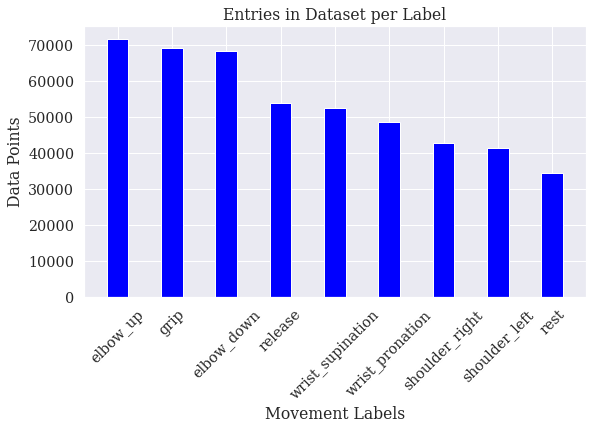

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

labels = ['elbow_up', 'grip', 'elbow_down', 'release', 'wrist_supination', 'wrist_pronation', 'shoulder_right', 'shoulder_left', 'rest']
values = [71793, 69273, 68395, 53905, 52563, 48767, 42850, 41300, 34517]

fig = plt.figure(figsize = (9, 5))

plt.bar(labels, values, color='blue', width=0.4)

plt.xticks(rotation = 45)
plt.xlabel("Movement Labels")
plt.ylabel("Data Points")
plt.title("Entries in Dataset per Label")
fig.savefig(f'/content/drive/MyDrive/models/Capstone/dataset.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()